In [115]:
%matplotlib inline
import IPython
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import ipywidgets
import contextily as ctx
from ipywidgets import interact, interactive, fixed, interact_manual

In [59]:
gdf_trees = geopandas.read_file('https://opendata.arcgis.com/datasets/979bbeefffea408e8f1cb7a397196c64_22.geojson')

In [60]:
City_Owned_Trees = pd.read_csv('City_Owned_Trees.csv',
                 names = ["UNIQUEID","INV_DATE","INSPECT_DT"],
                  parse_dates = ["INV_DATE", "INSPECT_DT"])

/Users/fengsfrancis/anaconda3/envs/DataViz/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,3,14,15,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [62]:
City_Owned_Trees = City_Owned_Trees.loc[:, City_Owned_Trees.notnull().any(axis = 0)]
City_Owned_Trees

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,UNIQUEID,INV_DATE,INSPECT_DT
X,Y,OBJECTID,ID,UNIQUEID,ADDRESS,STREET,ONSTR,FROMSTR,TOSTR,SIDE,SITE,SPP,COMMON,DBH,TRUNKS,COND,MT,GROW,OBSERVE,LOCTYPE,CULTIVAR,TREETYPE,INV_DATE,INSPECT_DT,NOTES,FACILITYID,SECTION,Special_Status,FAMILY,Staked_Status,Proprietary_ID,HydrationMat_Status,HydrationBag_Status
-88.2570930452148,40.1527234415946,1,1,RdG 20110912130753,3201,NOBEL DR,NEWTON DR,NOBEL DR,N PROSPECT AVE,Side Away,2,Quercus bicolor,"oak, swamp white",8,1,Fair,Young Tree Train,Tree Lawn or Parkway,None,Street,NaN,Tree,2011/09/12 00:00:00+00,2020/11/13 00:00:00+00,,1,36N,NaN,Fagaceae,NaN,1,NaN,NaN
-88.2575102414027,40.1527265425669,2,2,RdG 20110912131028,802,NEWTON DR,NEWTON DR,NOBEL DR,N PROSPECT AVE,Front,2,Quercus bicolor,"oak, swamp white",3,1,Good,Young Tree Train,Tree Lawn or Parkway,NaN,Street,NaN,Tree,2011/09/12 00:00:00+00,2020/11/13 00:00:00+00,,2,36N,Share the Cost,Fagaceae,NaN,2,NaN,NaN
-88.2573058179674,40.1526067226181,3,3,RdG 20110912131411,801,NEWTON DR,NEWTON DR,N PROSPECT AVE,NOBEL DR,Front,3,NaN,NaN,NaN,NaN,NaN,NaN,Tree Lawn or Parkway,NaN,Street,NaN,Vacant Site,2011/09/12 00:00:00+00,2016/10/13 00:00:00+00,,3,36N,NaN,NaN,NaN,3,NaN,NaN
-88.2568994980891,40.1527312196318,4,4,RdG 20110912130650,3201,NOBEL DR,NEWTON DR,NOBEL DR,N PROSPECT AVE,Side Away,1,Quercus bicolor,"oak, swamp white",6,1,Fair,Young Tree Train,Tree Lawn or Parkway,None,Street,NaN,Tree,2011/09/12 00:00:00+00,2020/11/13 00:00:00+00,,4,36N,NaN,Fagaceae,NaN,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-88.2931054090449,40.0999924085989,136622,NaN,NaN,2808,LAWNDALE DR,LAWNDALE DR,CENTENNIAL DR,MAPLEPARK DR,Front,1,Acer saccharinum,"maple, silver",36.0,1.0,Fair,NaN,Open or Unrestricted,NaN,Street,NaN,Tree,2021/06/22 00:00:00+00,2021/06/22 00:00:00+00,Private tree that grew in to r.o.w.,29009,15,NaN,Aceraceae,NaN,NaN,NaN,NaN
-88.2532440414838,40.155078975004,137023,NaN,NaN,511,YALOW DR,YALOW DR,LEGGETT LN,SHARP DR,Front,NaN,NaN,NaN,6.0,3.0,NaN,NaN,Tree Lawn or Parkway,NaN,Street,NaN,Stump,2021/08/30 00:00:00+00,2021/08/30 00:00:00+00,Multi stem,29013,36N,NaN,NaN,NaN,NaN,NaN,NaN
-88.264432700877,40.1183730617085,137423,NaN,NaN,1116,W CHURCH ST,W CHURCH ST,DAVIDSON DR,N JAMES ST,Front,1,NaN,NaN,NaN,NaN,NaN,NaN,Tree Lawn or Parkway,NaN,Street,NaN,Vacant Site,2021/09/01 00:00:00+00,2021/09/01 00:00:00+00,NaN,29010,11,NaN,NaN,NaN,NaN,NaN,NaN
-88.2719850288127,40.087717598194,137823,21175.0,BB 20111116093105,2118,GEORGETOWN CIR,GEORGETOWN CIR,HARBOR POINT DR,CUL-DE-SAC,Front,1,NaN,NaN,NaN,NaN,NaN,NaN,Tree Lawn or Parkway,NaN,Street,NaN,Vacant Site,2021/09/21 00:00:00+00,2021/09/21 00:00:00+00,,29011,23,NaN,NaN,NaN,NaN,NaN,NaN


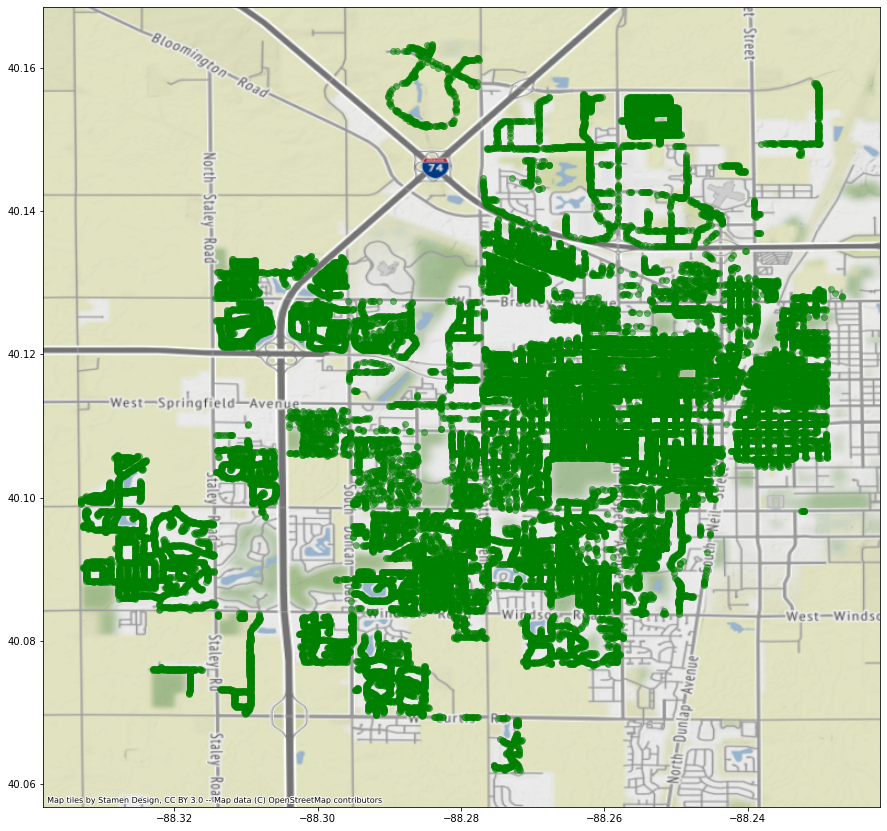

In [47]:
fig, ax = plt.subplots(figsize=(15,15))
gdf_trees.plot(ax=ax, alpha = 0.5, color='green')
ctx.add_basemap(ax = ax, crs = gdf_trees.crs)

plt.show()

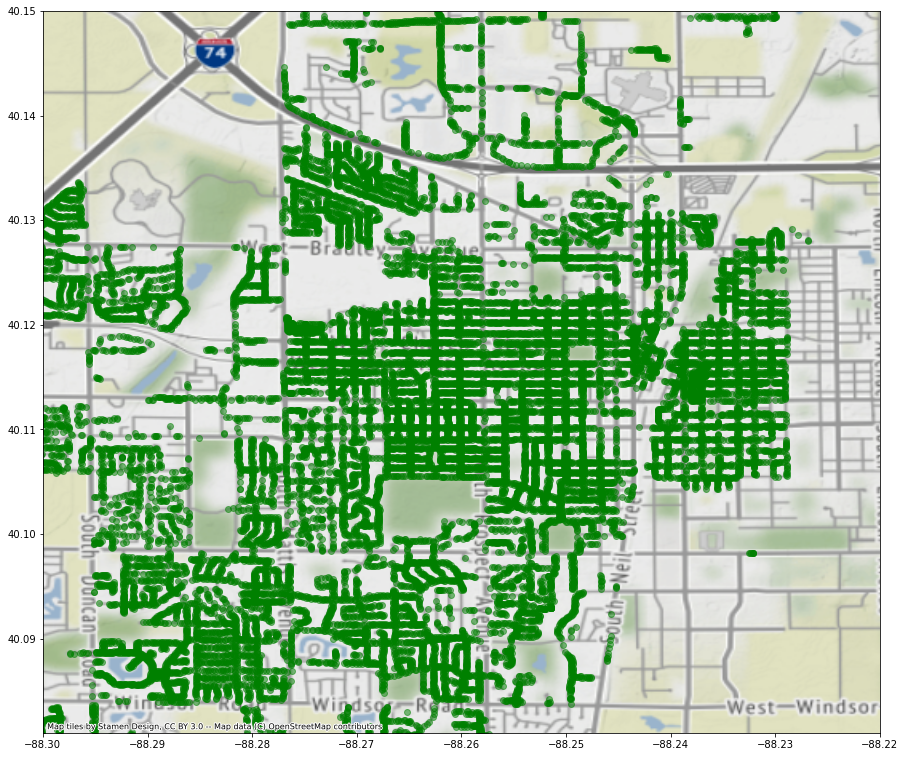

In [46]:
fig, ax = plt.subplots(figsize=(15,15))
gdf_trees.plot(ax=ax, alpha = 0.5, color='green')
ctx.add_basemap(ax = ax, crs = gdf_trees.crs)
ax.set_xlim(-88.30, -88.22)
ax.set_ylim(40.081, 40.15)
plt.show()

#### TASK 1: Assist the government in controlling the distribution of the trees, so it can prevent an imbalance of the distribution of the trees. 

In [65]:
total_trees_cond = City_Owned_Trees.groupby("COND")

KeyError: 'COND'

In [69]:
df = pd.read_csv('/Users/fengsfrancis/Documents/UIUC/is445/final project/City_Owned_Trees.csv')
df

/Users/fengsfrancis/anaconda3/envs/DataViz/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (11,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,OBJECTID,ID,UNIQUEID,ADDRESS,STREET,ONSTR,FROMSTR,TOSTR,...,INSPECT_DT,NOTES,FACILITYID,SECTION,Special_Status,FAMILY,Staked_Status,Proprietary_ID,HydrationMat_Status,HydrationBag_Status
0,-88.257093,40.152723,1,1.0,RdG 20110912130753,3201,NOBEL DR,NEWTON DR,NOBEL DR,N PROSPECT AVE,...,2020/11/13 00:00:00+00,,1,36N,NaN,Fagaceae,NaN,1.0,NaN,NaN
1,-88.257510,40.152727,2,2.0,RdG 20110912131028,802,NEWTON DR,NEWTON DR,NOBEL DR,N PROSPECT AVE,...,2020/11/13 00:00:00+00,,2,36N,Share the Cost,Fagaceae,NaN,2.0,NaN,NaN
2,-88.257306,40.152607,3,3.0,RdG 20110912131411,801,NEWTON DR,NEWTON DR,N PROSPECT AVE,NOBEL DR,...,2016/10/13 00:00:00+00,,3,36N,NaN,NaN,NaN,3.0,NaN,NaN
3,-88.256899,40.152731,4,4.0,RdG 20110912130650,3201,NOBEL DR,NEWTON DR,NOBEL DR,N PROSPECT AVE,...,2020/11/13 00:00:00+00,,4,36N,NaN,Fagaceae,NaN,4.0,NaN,NaN
4,-88.257312,40.152730,5,5.0,RdG 20110912130921,802,NEWTON DR,NEWTON DR,NOBEL DR,N PROSPECT AVE,...,2020/11/13 00:00:00+00,,5,36N,Share the Cost,Fagaceae,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29057,-88.293105,40.099992,136622,NaN,NaN,2808,LAWNDALE DR,LAWNDALE DR,CENTENNIAL DR,MAPLEPARK DR,...,2021/06/22 00:00:00+00,Private tree that grew in to r.o.w.,29009,15,NaN,Aceraceae,NaN,NaN,NaN,NaN
29058,-88.253244,40.155079,137023,NaN,NaN,511,YALOW DR,YALOW DR,LEGGETT LN,SHARP DR,...,2021/08/30 00:00:00+00,Multi stem,29013,36N,NaN,NaN,NaN,NaN,NaN,NaN
29059,-88.264433,40.118373,137423,NaN,NaN,1116,W CHURCH ST,W CHURCH ST,DAVIDSON DR,N JAMES ST,...,2021/09/01 00:00:00+00,NaN,29010,11,NaN,NaN,NaN,NaN,NaN,NaN
29060,-88.271985,40.087718,137823,21175.0,BB 20111116093105,2118,GEORGETOWN CIR,GEORGETOWN CIR,HARBOR POINT DR,CUL-DE-SAC,...,2021/09/21 00:00:00+00,,29011,23,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df_family = df.groupby("FAMILY")["UNIQUEID"].count()
df_family

FAMILY
Aceraceae            6573
Adoxaceae               0
Altingiaceae          492
Anacardiaceae          21
Annonaceae              2
Aquifoliaceae           1
Betulaceae            451
Bignoniaceae           41
Cercidiphyllaceae      56
Cornaceae             128
Cupressaceae          452
Ebenaceae               4
Eucommiaceae           37
Fabaceae              723
Fagaceae             4436
Ginkgoaceae           322
Hamamelidaceae          3
Hippocastanaceae       85
Juglandaceae           69
Lauraceae               7
Magnoliaceae          528
Malvaceae             993
Moraceae               54
Musaceae                1
Nyssaceae             120
Oleaceae              452
Pinaceae              539
Platanaceae           449
Rosaceae             1288
Rutaceae               17
Salicaceae             13
Sapindaceae            28
Simaroubaceae           6
Styracaceae             2
Ulmaceae             1188
Unknown Tree           23
Name: UNIQUEID, dtype: int64

#### Task2: Analyze Champaign's tree species to determine whether we can have more diversity among them to prevent mass infections of specific viruses. Or determine the most prevalent tree species in Champaign.

Writeup: For this Dashboard that I created, first, viewers can get a table of the information of the city owned trees. I import the map to make viewers can get a clearly understanding of the Arrangement of the trees that the Champaign city owned. From the second map that I plot, I focus on a specific location that can see that the trees are not that evenly distributed in the city. Some place are obviously lacked of the green. I did the statistic of the family of the city owned trees, which we can see that the species of the trees in the city are also not evenly being planted.